<a href="https://colab.research.google.com/github/SuzaKrish/Computer-Vision/blob/master/MosquitoClassifier_wingstructurebased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of Medium sized Culex_Pipiens and Culex_Restuans based on their wing structure

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D, Dropout, Dense, Flatten, Input, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import os
from os import path
import glob
import shutil

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/My_NN_Final/Data_Complete/'
keras.__version__


2.2.0-rc3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/My_NN_Final/Data_Complete


'2.3.0-tf'

In [ ]:
tf.__version__

'2.2.0-rc3'

#Data Acquisition 

In [ ]:
%cd '/content/drive/My Drive/My_NN_Final'
cur = '/content/drive/My Drive/My_NN_Final'
cur_dir_files = os.listdir()
print('Current dir files: {}'.format(cur_dir_files))
cur_dir = cur_dir_files[0]
print('Inner dir: {}'.format(cur_dir))
filepath = cur + '/' + cur_dir + '/'

def img_delivery(filepath, cno, l):
  list_cur_dir = os.listdir(filepath)
  print('Folders in inner dir: {}'.format(list_cur_dir))
  upto = 0
  P = []
  p = 0
  R = []
  r = 0
  cur_folder = glob.glob(filepath + list_cur_dir[cno] + '/*.tif')
  print(cur_folder)
  print('No. of images in this folder: {}'.format(len(cur_folder)))
  for i in cur_folder:
    upto += 1
    #if(upto == 200):
    #  break
    #print(i)
    img = cv2.imread(i, 0)
    img = cv2.resize(img, (224, 224))
    if(cno == 3): 
      P.append(img)
      l.append(0) 
      p += 1
    elif(cno == 0): #L sized pip
      P.append(img)
      l.append(2) 
      p += 1
    elif(cno == 1): 
      R.append(img)
      l.append(1) 
      r += 1
    elif(cno == 2): #L sized res
      R.append(img)
      l.append(3)
      r += 1
  
  P = np.asarray(P)
  R = np.asarray(R)

  if(cno == 3):
    print('Total Pip_M images loaded = {}'.format(p))
    print('Pip_M label shape: {}'.format(len(l)))
    print('Shape Pip_M: {}'.format(P.shape))
    return P, l
  elif(cno == 1):
    print('Total Res_M images loaded = {}'.format(r))
    print('Res_M label shape: {}'.format(len(l)))
    print('Res_M shape = {}'.format(R.shape))
    return R, l
  elif(cno == 2):
    print('Total Res_L images loaded = {}'.format(r))
    print('Res_L label shape: {}'.format(len(l)))
    print('Res_L shape = {}'.format(R.shape))
    return R, l
  elif(cno == 0):
    print('Total Pip_L images loaded = {}'.format(p))
    print('Pip_L label shape: {}'.format(len(l)))
    print('Shape Pip_L: {}'.format(P.shape))
    return P, l

l = []
Pipset_M, l = img_delivery(filepath, 3, l)
Resset_M, l = img_delivery(filepath, 1, l)
#Pipset_L, l = img_delivery(filepath, 0, l)
#Resset_L, l = img_delivery(filepath, 2, l)

/content/drive/My Drive/My_NN_Final
Current dir files: ['Data_Complete', 'Train', 'Test', 'Validation', 'TrainAnnotations.csv', 'ValidationAnnotations.csv', 'TestAnnotations.csv', 'logs', 'best_weights.h5', 'CNN_mosq_model.h5', 'checkpoint_keras']
Inner dir: Data_Complete
Folders in inner dir: ['Cx_Pipeans_L_Female', 'Cx_Restuans_M_Female', 'Cx_Restuans_L_Female', 'Cx_Pipeans_M_Female', 'TrainAnnotations.csv', 'ValidationAnnotations.csv', 'TestAnnotations.csv', 'logs', 'checkpoint_keras']
['/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_110_3(Left).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_059_1(Left).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_041_3(Right).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_110_3(Right).tif', '/content/drive/My Drive/My_NN_Final/Data_Complete/Cx_Pipeans_M_Female/Cx.pip_M_118_1(Left).tif', '/content/dri

In [ ]:
full = []
for i in Resset_M:
  full.append(i)
for i in Pipset_M:
  full.append(i)
#for i in Resset_L:
 # full.append(i)
#for i in Pipset_L:
 # full.append(i)
  
print('Full for now has: {} images'.format(len(full)))

full = np.asarray(full)
full = np.reshape(full, (full.shape[0], full.shape[1], full.shape[2], 1))
print('Full has the shape: {}'.format(full.shape))

l = keras.utils.to_categorical(l)
print('The label shape is : {}'.format(l.shape))

Full for now has: 1061 images
Full has the shape: (1061, 224, 224, 1)
The label shape is : (1061, 2)


Number of images in training: 795
Number of images in testing: 266


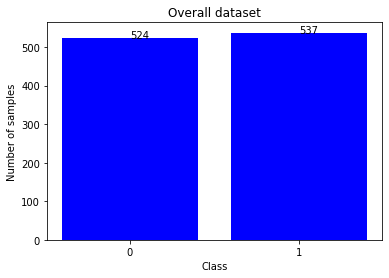

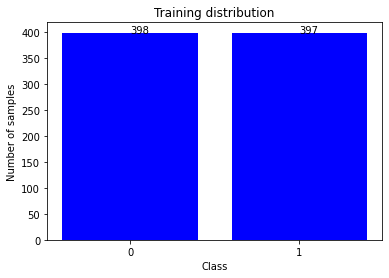

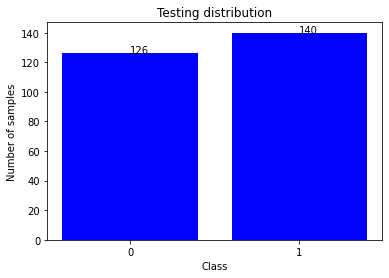

In [ ]:
#First we split to train and test datasets
from collections import Counter

xtrain, xtest, ytrain, ytest = train_test_split(full, l, shuffle = True)
print('Number of images in training: {}'.format(len(ytrain)))
print('Number of images in testing: {}'.format(len(ytest)))
def class_distribution(titlen, label):
  plt.figure()
  plt.title(titlen)
  num_classes = max(label) + 1
  count_map = Counter(label)
  counts = [count_map[i] for i in range(num_classes)]
  idx = np.arange(num_classes)
  rects = plt.bar(idx, counts, width=0.8, color='b')
  plt.xlabel('Class')
  plt.ylabel('Number of samples')
  plt.xticks(idx, idx)
  height = counts
  for i in range(len(rects)):
    plt.annotate('{}'.format(height[i]), xy = (idx[i], height[i]))
  plt.show()
  return

class_distribution('Overall dataset', np.argmax(l, axis=1))
class_distribution('Training distribution', np.argmax(ytrain, axis=1))
class_distribution('Testing distribution', np.argmax(ytest, axis=1))

#Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

def get_callbacks():

   path_checkpoint ='checkpoint_keras'  
   log_dir='logs'
   
   callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                         monitor='val_loss',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         period=1)
   callback_early_stopping = EarlyStopping(monitor='val_loss',
                                           patience=5,
                                           verbose=1)
   callback_tensorboard = TensorBoard(log_dir=log_dir,
                                      histogram_freq=0,
                                      write_graph=False)
   callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.1,
                                          min_lr=1e-4,
                                          patience=3,
                                          verbose=1)

   callbacks = [callback_checkpoint, callback_tensorboard, callback_reduce_lr]

   return callbacks

#CNN Model Building

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape = (224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Conv2D(32,(5,5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      832       
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
activation_2 (Activation)    (None, 106, 106, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 179776)           

In [ ]:
history = model.fit(xtrain, ytrain, batch_size=20, epochs= 30, validation_split= 0.25, callbacks= get_callbacks())


model.save_weights('best_weights.h5')

Train on 596 samples, validate on 199 samples
Epoch 1/30
596/596 [==============================] - 73s 123ms/step - loss: 0.6410 - accuracy: 0.6158 - val_loss: 0.6548 - val_accuracy: 0.5678

Epoch 00001: val_loss improved from -inf to 0.65480, saving model to checkpoint_keras
Epoch 2/30
596/596 [==============================] - 73s 123ms/step - loss: 0.5921 - accuracy: 0.6695 - val_loss: 0.6759 - val_accuracy: 0.5829

Epoch 00002: val_loss improved from 0.65480 to 0.67590, saving model to checkpoint_keras
Epoch 3/30
596/596 [==============================] - 73s 122ms/step - loss: 0.5332 - accuracy: 0.7315 - val_loss: 0.7143 - val_accuracy: 0.5829

Epoch 00003: val_loss improved from 0.67590 to 0.71426, saving model to checkpoint_keras
Epoch 4/30
596/596 [==============================] - 73s 122ms/step - loss: 0.4146 - accuracy: 0.8171 - val_loss: 0.7239 - val_accuracy: 0.6332

Epoch 00004: val_loss improved from 0.71426 to 0.72387, saving model to checkpoint_keras

Epoch 00004: Red

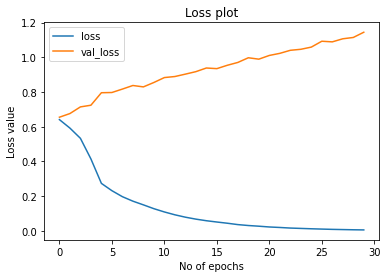

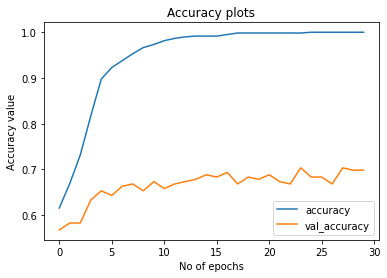

In [ ]:
plt.figure()
plt.xlabel('No of epochs')
plt.ylabel('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss plot')
plt.show()

plt.figure()
plt.xlabel('No of epochs')
plt.ylabel('Accuracy value')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy plots')
plt.show()

#Saving!

In [ ]:
model.save('CNN_mosq_model.h5')

#Testing

In [ ]:
history1 = model.evaluate(xtest, ytest, batch_size = 25)

265/265 [==============================] - 7s 26ms/step


#Evaluation metrics for Model performance

In [ ]:
predictions = model.predict_classes(xtest)
testgt = np.argmax(ytest, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(testgt, predictions)))
print('Classification Report: \n {}'.format(classification_report(testgt, predictions)))

Confusion matrix: 
[[80 46]
 [40 99]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       126
           1       0.68      0.71      0.70       139

    accuracy                           0.68       265
   macro avg       0.67      0.67      0.67       265
weighted avg       0.68      0.68      0.67       265

